In [1]:
import numpy as np
import tensorflow as tf

# Regression Example using Neural Network

In [2]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [3]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [4]:
y_label

array([  1.26160924,   1.03344894,   1.43203717,   3.75646705,
         4.30902251,   5.84038662,   6.46344778,   8.2094152 ,
         8.8246708 ,  11.01662462])

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

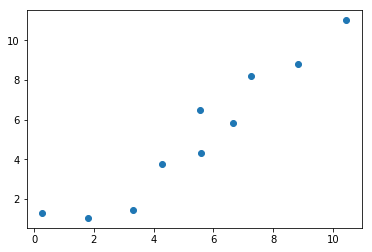

In [6]:
plt.plot(x_data,y_label,'o')

y = mx+b

In [7]:
np.random.rand(2)

array([ 0.56584619,  0.48484343])

In [8]:
m = tf.Variable(0.80)
b = tf.Variable(0.52)

In [9]:
error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = tf.add(tf.multiply(m,x),b)
    error += (y-y_hat)**2

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [11]:
init = tf.global_variables_initializer()

In [12]:
saver = tf.train.Saver()

# Create Session and Run.

In [14]:
with tf.Session() as sess:
    
    sess.run(init)
    training_steps = 10000
    for i in range(training_steps):
        sess.run(train)
        final_slope,final_intercept = sess.run([m,b])
    
    # Once done, save your model
    # Make sure to provide a directory for it to make or go to. May get errors otherwise
    
    saver.save(sess,'models/my_first_model.ckpt')
    

In [46]:
final_slope

0.97958714

In [47]:
final_intercept

-0.26112035

In [48]:
x_test = np.linspace(-1,11,10)
# y = mx+b
y_pred_plot = x_test*final_slope + final_intercept

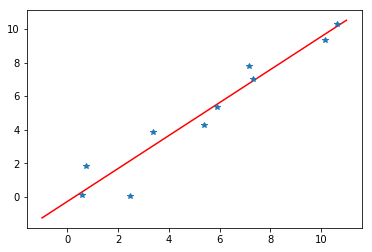

In [49]:
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')

# Loading a Model

In [15]:
with tf.Session() as sess:
    saver.restore(sess,'models/my_first_model.ckpt')
    
    restored_slope,restored_intercept = sess.run([m,b])

INFO:tensorflow:Restoring parameters from models/my_first_model.ckpt


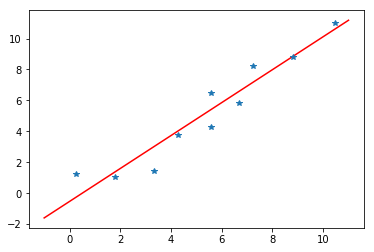

In [16]:
x_test = np.linspace(-1,11,10)
y_pred_plot = restored_slope*x_test + restored_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')